# Name Based Gender Classification Using NLP and Python

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

### Load the dataset

In [5]:
dataset = pd.read_csv("/content/Indian-Name.csv", encoding='latin-1') # or 'cp1252', 'ISO-8859-1', etc.

In [ ]:
## dataset1.head()

In [6]:
dataset.head()

,Name,Target,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Yash,1,NaN,NaN,NaN,NaN
1,Prit,1,NaN,NaN,NaN,NaN
2,Meet,1,NaN,NaN,NaN,NaN
3,Drashti,0,NaN,NaN,NaN,NaN
4,Saloni,0,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [7]:
dataset.columns

Index(['Name', 'Target', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [8]:
## print(dataset1.dtypes)
## print("\n\n")
print(dataset.columns)
print(dataset.dtypes)

Index(['Name', 'Target', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')
Name           object
Target          int64
Unnamed: 2    float64
Unnamed: 3    float64
Unnamed: 4    float64
Unnamed: 5    float64
dtype: object


In [11]:
dataset['Gender'] = dataset['Target'].replace({0:"M",1:"F"})

In [12]:
dataset = dataset.loc[:,['Name', 'Gender']]

In [ ]:
## data = pd.concat([dataset1, dataset2])

In [13]:
dataset.shape

(1299, 2)

In [14]:
dataset.dtypes

,0
Name,object
Gender,object


In [15]:
dataset.isnull().sum()

,0
Name,0
Gender,0


It is clear from the above output that there are no missing values in the dataset being used

In [16]:
len(dataset['Name'].unique())

1181

In [17]:
dataset['Gender'].unique()

array(['F', 'M'], dtype=object)

In [18]:
dataset['Gender'].value_counts()

,count
Gender,
M,681
F,618


Let us create a plot to see how many male and female names are present in the dataset

([<matplotlib.axis.XTick at 0x7bcb70472440>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

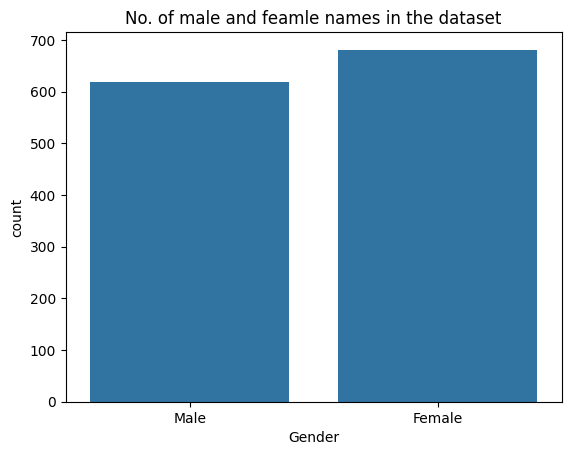

In [19]:
sns.countplot(x='Gender',data = dataset)
plt.title('No. of male and feamle names in the dataset')
plt.xticks([0,1],('Male','Female'))

It is evident that there is no class imbalance in the dataset
that is there is no major difference in the no. of names of men and women

In [20]:
dataset['Name'].value_counts()[::-1][:5]

,count
Name,
Harprit,1
Rakshit,1
Rensi,1
Jensi,1
Avnish,1


This snippet shows the names which occure the least number of times in the dataset

Next, we let us look into how many names start with A, B...Z and their percentage as compared to the entire dataset

In [21]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
total_percent=0
total_count = 0
startletter_count = {}
for i in alphabets:
    print('Number of names starting with {} are '.format(i),len(dataset[dataset['Name'].str.startswith(i)]))
    startletter_count[i] = len(dataset[dataset['Name'].str.startswith(i)])
    print('Percent: ',len(dataset[dataset['Name'].str.contains(i)])/len(dataset['Name'])*100)
    print('\n')
    total_count = total_count + len(dataset[dataset['Name'].str.contains(i)])
    total_percent=total_percent+(len(dataset[dataset['Name'].str.contains(i)])/len(dataset['Name'])*100)
print('Total names = ', total_count)
print("Total percentage = ", total_percent)

Number of names starting with A are  122
Percent:  9.39183987682833


Number of names starting with B are  46
Percent:  3.541185527328714


Number of names starting with C are  20
Percent:  1.539645881447267


Number of names starting with D are  78
Percent:  6.0046189376443415


Number of names starting with E are  6
Percent:  0.4618937644341801


Number of names starting with F are  11
Percent:  0.8468052347959968


Number of names starting with G are  33
Percent:  2.5404157043879905


Number of names starting with H are  55
Percent:  4.234026173979984


Number of names starting with I are  22
Percent:  1.6936104695919936


Number of names starting with J are  49
Percent:  3.7721324095458044


Number of names starting with K are  80
Percent:  6.158583525789068


Number of names starting with L are  15
Percent:  1.1547344110854503


Number of names starting with M are  108
Percent:  8.314087759815243


Number of names starting with N are  89
Percent:  6.851424172440339


Number of nam

In [22]:
print(startletter_count)

{'A': 122, 'B': 46, 'C': 20, 'D': 78, 'E': 6, 'F': 11, 'G': 33, 'H': 55, 'I': 22, 'J': 49, 'K': 80, 'L': 15, 'M': 108, 'N': 89, 'O': 4, 'P': 79, 'Q': 0, 'R': 118, 'S': 205, 'T': 40, 'U': 15, 'V': 66, 'W': 0, 'X': 0, 'Y': 17, 'Z': 8}


Text(0.5, 1.0, 'Number of names starting with each letter')

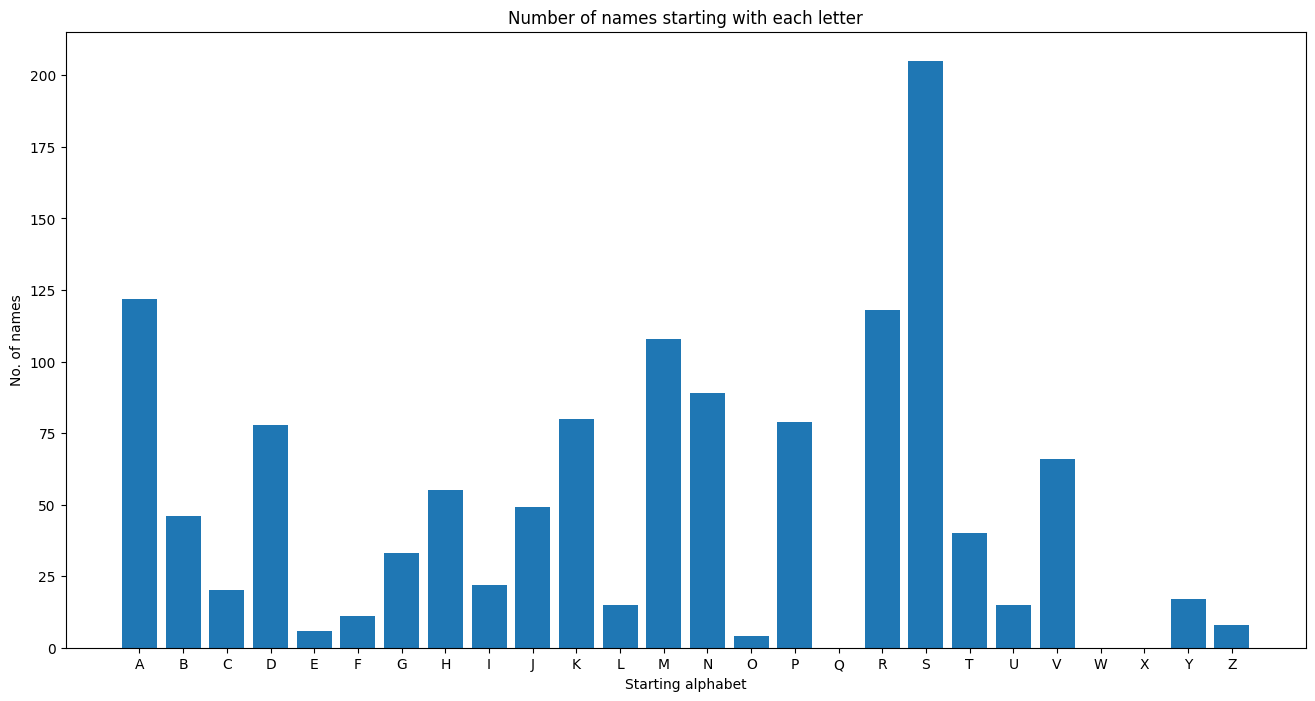

In [23]:
plt.figure(figsize = (16,8))
plt.bar(startletter_count.keys(),startletter_count.values())
plt.xlabel('Starting alphabet')
plt.ylabel('No. of names')
plt.title('Number of names starting with each letter')

Top 5 alphabets with which most of the namesstart are:

In [24]:
# most common starting letter
print('The 5 most name starting letters are : ', *sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name starting letters are :  ('S', 205) ('A', 122) ('R', 118) ('M', 108) ('N', 89)


Most rarest in the dataset

In [25]:
# the most rarest indian name
print(dataset[dataset['Name'].str.contains('X')])

Empty DataFrame
Columns: [Name, Gender]
Index: []


Now, let us see how many names end with the alphabets a,b...z

In [26]:
small_alphabets = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']
endletter_count ={}
for i in small_alphabets:
    endletter_count[i]=len(dataset[dataset['Name'].str.endswith(i)])
print(endletter_count)

{'a': 379, 'b': 7, 'c': 0, 'd': 17, 'e': 8, 'f': 3, 'g': 10, 'h': 106, 'i': 224, 'j': 22, 'k': 38, 'l': 99, 'm': 36, 'n': 105, 'o': 3, 'p': 15, 'q': 1, 'r': 56, 's': 6, 't': 65, 'u': 35, 'v': 22, 'x': 1, 'y': 35, 'z': 3}


Text(0.5, 1.0, 'Number of names ending with each letter')

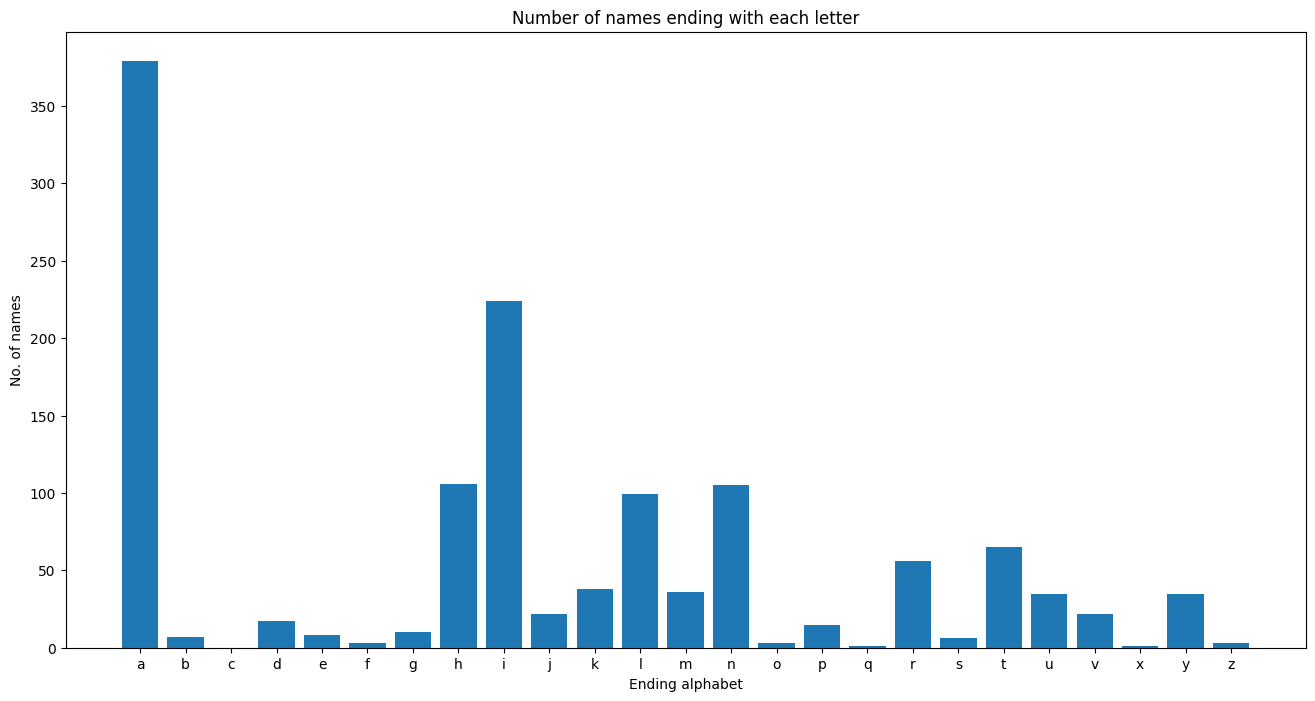

In [27]:
plt.figure(figsize = (16,8))
plt.bar(endletter_count.keys(),endletter_count.values())
plt.xlabel('Ending alphabet')
plt.ylabel('No. of names')
plt.title('Number of names ending with each letter')

Top 5 alphabets with which most of the indian names end are:

In [28]:
# most common ending letter
print('The 5 most name ending letters are : ', *sorted(endletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name ending letters are :  ('a', 379) ('i', 224) ('h', 106) ('n', 105) ('l', 99)


Let us now build a word cloud of the names present in the dataset

In [29]:
# building a wordcloud
text =  " ".join(i for i in dataset.Name)
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="white",
        colormap="BuPu",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)

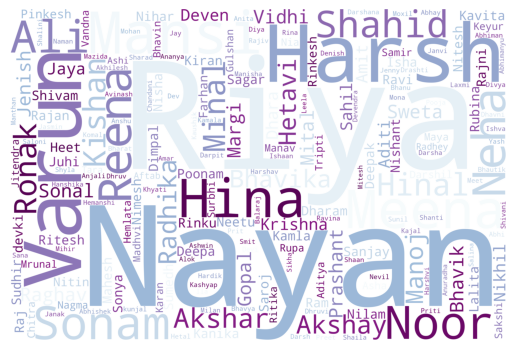

In [30]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

### Building a model

In [31]:
X =list( dataset['Name'])
Y = list(dataset['Gender'])

We encode the 'F' and 'M' labels in the target attribute for easier modeling

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

A count vectorizer is used to convert string-type names into array-like data

In [33]:
# count vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='char')
X=cv.fit_transform(X).toarray()

Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### 1) Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [36]:
LR_y_pred = LR_model.predict(x_test)

In [ ]:
# Naive Bayes

### 2) Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(x_train,y_train)

MultinomialNB()

In [38]:
NB_y_pred = NB_model.predict(x_test)

### 3) XGBoost

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [41]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(use_label_encoder= False)
XGB_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:06:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
XGB_y_pred = XGB_model.predict(x_test)

### Result Comparison

In [43]:
from sklearn.metrics import confusion_matrix
def cmatrix(model):
    y_pred = model.predict(x_test)
    cmatrix = confusion_matrix(y_test, y_pred)
    print(cmatrix)
    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')

0.655011655011655
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       205
           1       0.66      0.70      0.68       224

    accuracy                           0.66       429
   macro avg       0.65      0.65      0.65       429
weighted avg       0.65      0.66      0.65       429

[[124  81]
 [ 67 157]]
None


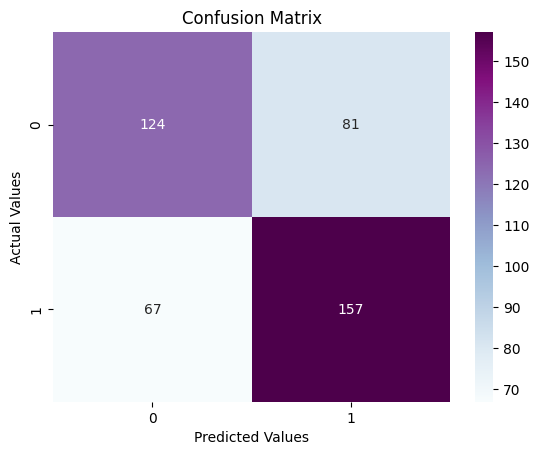

In [44]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(LR_y_pred,y_test))
print(metrics.classification_report(y_test, LR_y_pred))
print(cmatrix(LR_model))

In [45]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(NB_y_pred,y_test))
print(metrics.classification_report(y_test, NB_y_pred))

0.5874125874125874
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       205
           1       0.59      0.70      0.64       224

    accuracy                           0.59       429
   macro avg       0.59      0.58      0.58       429
weighted avg       0.59      0.59      0.58       429



[[ 95 110]
 [ 67 157]]


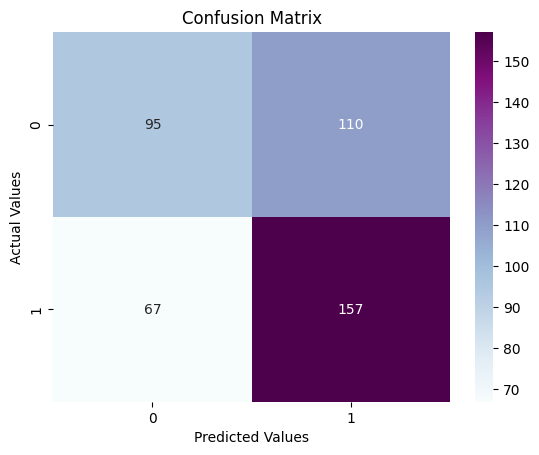

In [46]:
cmatrix(NB_model)

In [47]:
print(metrics.accuracy_score(XGB_y_pred,y_test))
print(metrics.classification_report(y_test,XGB_y_pred))

0.662004662004662
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       205
           1       0.67      0.68      0.68       224

    accuracy                           0.66       429
   macro avg       0.66      0.66      0.66       429
weighted avg       0.66      0.66      0.66       429



[[131  74]
 [ 71 153]]


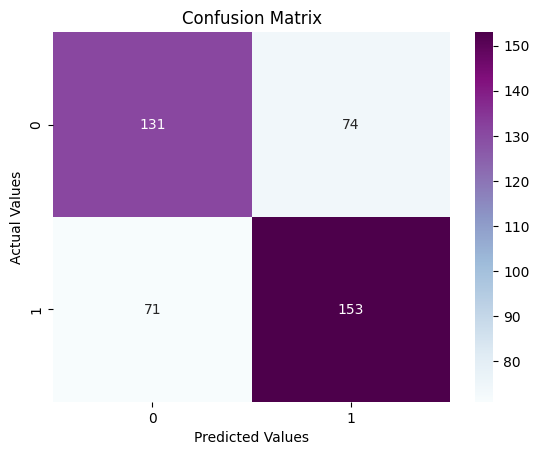

In [48]:
cmatrix(XGB_model)

### 4) LSTM

In [ ]:
#LSTM

In [49]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.layers import LSTM

In [50]:
max_words = 1000
max_len = 26

Defining the LSTM layers

In [52]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_words,40,input_length=26))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(100))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(64,activation='relu'))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(1,activation='sigmoid'))
LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(LSTM_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Training the LSTM model

In [53]:
LSTM_model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.5063 - loss: 0.6925
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5233 - loss: 0.6931
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5207 - loss: 0.6910
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5423 - loss: 0.6913
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4934 - loss: 0.6917
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5380 - loss: 0.6857
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4718 - loss: 0.6949
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5493 - loss: 0.6904
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5180 - loss: 0.6902
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5050 - loss: 0.6927
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5147 - loss: 0.6913
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/ste

Saving the model

In [54]:
LSTM_model.save('NameGenderClassification.hdf5')

In [56]:
import pickle
pickle.dump(LSTM_model, open("model.pickle", 'wb'))

In [58]:
import pickle
pickle.dump(cv, open("cv.pickle", "wb"))

Making a sample prediction

In [62]:
def predict(name):
    name_samplevector = cv.transform([name]).toarray()
    prediction = LSTM_model.predict([name_samplevector])
    if prediction >=0.7:
        out = 'Male ♂'
    else:
        out = 'Female ♀'
    print(name+' is a '+ out)

In [63]:
predict('Tanisha')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Tanisha is a Female ♀
